# 패키지 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret
!pip install autokeras

     |████████████████████████████████| 264 kB 4.2 MB/s 
     |████████████████████████████████| 111 kB 56.8 MB/s 
     |████████████████████████████████| 1.7 MB 45.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 248 kB 55.4 MB/s 
     |████████████████████████████████| 271 kB 59.3 MB/s 
     |████████████████████████████████| 14.6 MB 117 kB/s 
     |████████████████████████████████| 1.3 MB 61.2 MB/s 
     |████████████████████████████████| 6.8 MB 42.6 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 167 kB 56.7 MB/s 
     |████████████████████████████████| 2.0 MB 57.7 MB/s 
     |████████████████████████████████| 102 kB 58.0 MB/s 
     |████████████████████████████████| 62 kB 900 kB/s 
     |████████████████████

In [3]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import autokeras as ak
from sklearn.model_selection import train_test_split
from pycaret.classification import *

# 데이터 불러오기

In [4]:
cd '/content/drive/MyDrive/DCC/structure data/task1/mini'

/content/drive/MyDrive/DCC/structure data/task1/mini


In [5]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv("./data/test_x.csv")
submission = pd.read_csv('data/sample_submission.csv')

In [6]:
print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 78)
(11383, 77)
(11383, 2)


In [7]:
# 타겟 voted
clf = setup(data = train, target="voted")

,Description,Value
0,session_id,6346
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 78)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,35
8,Ordinal Features,False
9,High Cardinality Features,False


# 모델비교

In [8]:
best = compare_models(sort='AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6937,0.7633,0.6350,0.7645,0.6937,0.3927,0.3995,21.894
lightgbm,Light Gradient Boosting Machine,0.6929,0.7620,0.6406,0.7596,0.6950,0.3902,0.3960,1.378
lda,Linear Discriminant Analysis,0.6906,0.7612,0.6586,0.7454,0.6992,0.3831,0.3863,1.365
et,Extra Trees Classifier,0.6888,0.7598,0.6399,0.7535,0.6920,0.3818,0.3871,8.727
ada,Ada Boost Classifier,0.6883,0.7549,0.6535,0.7447,0.6960,0.3790,0.3824,4.334
rf,Random Forest Classifier,0.6850,0.7533,0.6320,0.7518,0.6867,0.3747,0.3804,9.041
dt,Decision Tree Classifier,0.6113,0.6075,0.6482,0.6432,0.6456,0.2152,0.2153,1.520
lr,Logistic Regression,0.5455,0.5479,0.9960,0.5461,0.7054,-0.0011,-0.0056,2.550
nb,Naive Bayes,0.4545,0.5175,0.0119,0.5376,0.0232,-0.0005,-0.0023,0.102
knn,K Neighbors Classifier,0.5102,0.5071,0.5534,0.5517,0.5525,0.0116,0.0116,38.650


In [ ]:
best_ac = compare_models(sort='Accuracy', n_select = 3)

In [9]:
best[0]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6346, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# 하이퍼 파라미터 튜닝

In [12]:
tune_best=[tune_model(i, n_iter=10, optimize='AUC') for i in best]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7020,0.7726,0.6745,0.7542,0.7121,0.4053,0.4080
1,0.6863,0.7596,0.6510,0.7431,0.6940,0.3751,0.3786
2,0.6812,0.7495,0.6470,0.7376,0.6893,0.3648,0.3682
3,0.6862,0.7608,0.6515,0.7428,0.6942,0.3748,0.3782
4,0.6818,0.7505,0.6416,0.7412,0.6878,0.3668,0.3708
5,0.6928,0.7616,0.6496,0.7540,0.6979,0.3889,0.3934
6,0.7022,0.7679,0.6858,0.7481,0.7156,0.4044,0.4061
7,0.6862,0.7593,0.6502,0.7433,0.6936,0.3750,0.3785
8,0.7022,0.7803,0.6812,0.7506,0.7142,0.4049,0.4070
9,0.6768,0.7501,0.6347,0.7372,0.6821,0.3572,0.3613


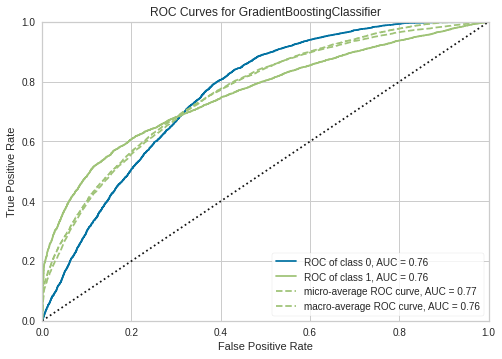

In [15]:
plot_model(tune_best[0], 'auc')

# 모델 블렌딩

### voting 방식


> hard: 다수의 분류기가 예측한 값을 최종 결과값으로 정함

> soft: 결정 확률들을 모두 더한 후 이를 평균을 취해서 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정

*일반적으로 소프트 보팅 사용함*


In [16]:
blended_models = blend_models(estimator_list = tune_best, optimize='AUC', method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7017,0.7760,0.6665,0.7583,0.7094,0.4056,0.4091
1,0.6910,0.7648,0.6406,0.7566,0.6938,0.3863,0.3918
2,0.6796,0.7548,0.6372,0.7405,0.6850,0.3628,0.3670
3,0.6941,0.7632,0.6418,0.7611,0.6964,0.3926,0.3984
4,0.6793,0.7545,0.6284,0.7447,0.6816,0.3632,0.3686
5,0.6963,0.7653,0.6468,0.7613,0.6994,0.3965,0.4019
6,0.7003,0.7697,0.6720,0.7529,0.7102,0.4021,0.4048
7,0.6900,0.7647,0.6456,0.7518,0.6947,0.3835,0.3881
8,0.7082,0.7845,0.6806,0.7601,0.7182,0.4175,0.4203
9,0.6856,0.7544,0.6312,0.7533,0.6869,0.3761,0.3820


# 예측하기

### 전체 데이터에 대한 재학습

In [18]:
# 마지막 학습(Finalize)
final_model = finalize_model(blended_models)

# 예측(Predict)
pred = predict_model(final_model, data = test)
submission['voted'] = pred['Score']
display(submission.head())
submission.to_csv('./data/submission_soft.csv', index=False)

,index,voted
0,0,0.6701
1,1,0.8672
2,2,0.5334
3,3,0.8076
4,4,0.7902
